## Informações relevantes sobre o modelo escolhido: **RealMLP**
Real valued Multi-Layer Perceptron - é um modelo de deep learning avançado, projetado para superar o Gradiente Boosted Decision Trees (XGBoost - CatBoost - LightGBM) em dados tabulares.

- é um conjunto otimizado de técnicas aplicado a um perceptron multicamadas simples.
- é um algoritmo de aprendizado supervisionado que aprende uma função *f:R^m -> R^0* treinando em um conjunto de dados, onde o m é o número de dimensões para entrada e é o O número de dimensões para saída.
- Dado um conjunto de características X = {x1,x2,...,xm} e um alvo y, ele pode aprender um aproximador de função não linear para classificação ou regressão.
- É diferente da regressão logística, pois entre a camada de entrada e a de saída, pode haver uma ou mais camadas não lineares, chamadas camadas ocultas. 

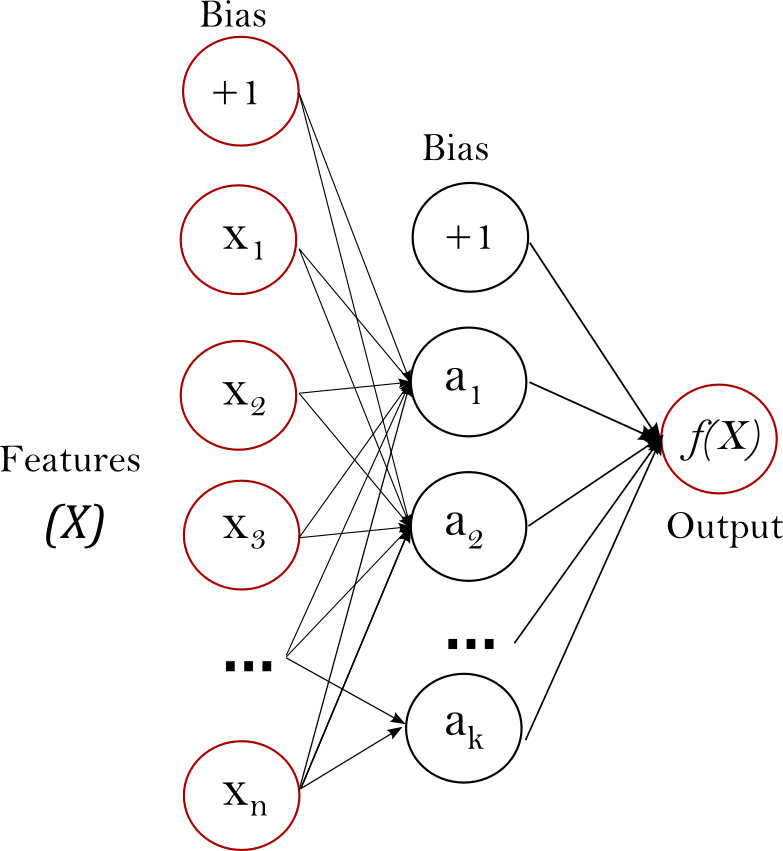


- O módulo contém os atributos públicos `coefs_` e `intercepts_`. `coefs_` é uma lista de matrizes de pesos, onde a matriz de pesos no índice *i* representa os pesos entre a camada *i* e a camada *i+1*. `intercepts_` é uma lista de vetores de viés, onde o vetor no índice *i* representa os valores de viés adicionados à camada *i+1*.

### Por que o treinamento é demorado:
---
**Validação Cruzada (Cross-Validation)**: Você está usando StratifiedKFold com N_FOLDS = 5. Isso significa que o modelo completo está sendo treinado 5 vezes diferentes (uma para cada fold), o que naturalmente multiplica o tempo de treinamento por 5.

**Ensemble (n_ens = 8):** Dentro de cada fold, a classe RealMLP_TD_Classifier está configurada para treinar um ensemble de 8 modelos (n_ens: 8). Um ensemble geralmente melhora a robustez e o desempenho, mas significa que, para cada fold, 8 modelos são treinados. Combinando isso com a validação cruzada, o treinamento total é aproximadamente 5 (folds) * 8 (modelos por ensemble) = 40 treinamentos de modelos individuais.

**Número de Épocas e Tamanho do Batch:** O param_grid define n_epochs: 100 e batch_size: 128. Treinar um modelo por 100 épocas, especialmente com um dataset grande (630.000 linhas) e um tamanho de batch moderado, leva tempo.

**Complexidade do Modelo (RealMLP_TD_Classifier):** Modelos de redes neurais como o RealMLP_TD_Classifier, com n_hidden_layers: 4 e hidden_width: 384, são computacionalmente intensivos.

### Para reproduzir o modelo treinado em uma aplicação é necessário alguns passos
---
1. Carregar o Modelo Salvo (nesse caso):

In [ ]:
from pytabkit import RealMLP_TD_Classifier

# Carrega o modelo salvo. Certifique-se de que o arquivo 'model_save' está acessível.
loaded_model = RealMLP_TD_Classifier.load('model_save')

print("Modelo carregado com sucesso!")

2. Preparar os Dados de Entrada: Qualquer nova entrada de dados para previsão deve passar exatamente pelo mesmo pré-processamento que os dados de treinamento.

É crucial que os novos dados (por exemplo, de um único paciente) sejam pré-processados exatamente da mesma forma que os dados de treinamento. Isso inclui engenharia de features e conversão de tipos de dados. Usarei um exemplo hipotético para new_data.

In [ ]:
import pandas as pd

# Exemplo de novos dados para predição
# IMPORTANTE: Estes dados devem ter as mesmas colunas e passar pelos mesmos passos de engenharia de features 
# (por exemplo, `add_engineered_features`) e tipagem que `X` e `X_test`.
# Aqui, estou usando uma linha de X_test apenas para ilustração.

# Vamos pegar a primeira linha de X_test para simular novos dados.
# Em um cenário real, você teria um novo DataFrame com as características do paciente.
new_raw_data = test.drop(['id'], axis=1).iloc[[0]] # Pega a primeira linha de 'test' sem o 'id'

# Certifique-se de aplicar a mesma conversão de tipo de dado para 'category'
for col in new_raw_data.columns:
    new_raw_data[col] = new_raw_data[col].astype(str).astype('category')

display(new_raw_data)
print(f"Shape dos novos dados para previsão: {new_raw_data.shape}")

3. Fazer Previsões: Usar o modelo carregado para gerar previsões.

In [ ]:
# Fazer a previsão usando o modelo carregado
# O .predict_proba() retorna as probabilidades para ambas as classes [0, 1]
# Para um classificador binário, geralmente queremos a probabilidade da classe positiva (índice 1)

prediction_probabilities = loaded_model.predict_proba(new_raw_data)[:, 1]

print(f"Probabilidade de Doença Cardíaca: {prediction_probabilities[0]:.4f}")

# Você pode definir um limite para classificar (por exemplo, 0.5)
predicted_class = 1 if prediction_probabilities[0] >= 0.5 else 0
print(f"Classe Predita: {predicted_class}")

### Documentação a acessar para determinar os parâmetros manualmente
---
- https://pytabkit.readthedocs.io/en/latest/models/examples.html
- https://pytabkit.readthedocs.io/en/latest/models/01_sklearn_interfaces.html